<a href="https://colab.research.google.com/github/wlcosta/es235_pdi/blob/master/15_hough_circulos/lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aula 15 - Transformada de Hough - Detecção de Círculos

Vamos aplicar a Transformada de Hough usando o OpenCV para **detecção de círculos**.

Começamos importando as bibliotecas necessárias:

In [1]:
%matplotlib inline
import cv2 # OpenCV
import matplotlib.pyplot as plt # Matplotlib
import numpy as np # Numpy

In [2]:
# Vamos usar algumas imagens hoje :)
!wget https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/hough_circles_specific/240_pepsi_12oz.png
!wget https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/hough_circles_specific/audi.png
!wget https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/hough_circles_specific/chevette.png
!wget https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/hough_circles_specific/frutas.png
!wget https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/hough_circles_specific/olho-1.png
!wget https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/hough_circles_specific/plot.png

--2021-06-23 20:41:40--  https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/hough_circles_specific/240_pepsi_12oz.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35514 (35K) [image/png]
Saving to: ‘240_pepsi_12oz.png’

240_pepsi_12oz.png  100%[===================>]  34.68K  --.-KB/s    in 0.003s  

2021-06-23 20:41:40 (12.1 MB/s) - ‘240_pepsi_12oz.png’ saved [35514/35514]

--2021-06-23 20:41:40--  https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/hough_circles_specific/audi.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting

Agora, carregaremos a imagem de testes. Usaremos uma imagem com um círculo bem visível.

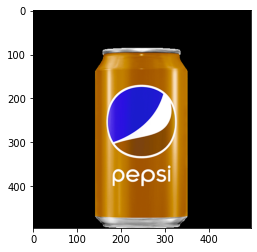

In [64]:
img = cv2.imread('240_pepsi_12oz.png')
plt.imshow(img)

Algumas implementações desse processo iniciam suavizando a imagem com um filtro gaussiano ou de médias. Vamos testar os dois resultados :)

Complete o código abaixo seguindo o seguinte pipeline: cada imagem precisa ser convertida para RGB e em seguida, grayscale. No caso da imagem com o blur, use o método [cv2.medianBlur](https://docs.opencv.org/4.5.2/d4/d86/group__imgproc__filter.html#ga564869aa33e58769b4469101aac458f9) que recebe como entrada apenas dois argumentos: imagem de entrada e o tamanho do kernel, que aqui usaremos 5.

Siga os comentários de cada linha para completar corretamente o código.

In [65]:
# A variável "img" será a imagem de entrada, sem o blur
# e a variável "img_b" será a que iremos aplicar o borramento.

img = None # Convertemos primeiro para RGB
img_b = None.astype('uint8') # Agora, copiamos a imagem de entrada e adicionamos blur
img_cinza = None # Imagem original (img) em grayscale
img_b = None # Imagem com blur (img_b) em grayscale

Já existe uma implementação para a detecção de círculos. Usaremos o método [cv2.HoughCircles](https://docs.opencv.org/3.1.0/dd/d1a/group__imgproc__feature.html#ga47849c3be0d0406ad3ca45db65a25d2d) para isso, e é recomendável ler a documentação para entender alguns parâmetros.

Complete o código abaixo usando o método cv2.HoughCircles com os seguintes parâmetros:

1. A imagem de entrada. Use primeiro **img_cinza** e depois **img_b**.
1. Uma flag que indica o método usado para o gradiente. Aqui, usaremos **cv2.HOUGH_GRADIENT** que implementa a abordagem do artigo publicado por Yuen et al. (1990) chamado [Comparative study of Hough Transform methods for circle finding](https://www.sciencedirect.com/science/article/abs/pii/026288569090059E)
1. **dp** - a taxa inversa da resolução do acumulador em relação à resolução da imagem. Se dp=1, o acumulador tem a mesma resolução da imagem original, se dp=2, metade, e etc. Use **dp=1.2**
2. **minDist** - a distância mínima entre os centros dos círculos detectados. Se for muito grande, alguns círculos são ignorados. **Use minDist=100**.

In [93]:
circulos = None # Recebe como entrada img_cinza
circulos_b = None # Recebe como entrada img_b

A variável **circulos** agora é uma lista de listas contendo a seguinte informação de cada círculo:
1. x
2. y
3. r (raio)

Vamos verificar:

In [94]:
circulos = np.round(circulos[0, :]).astype("int")
circulos_b = np.round(circulos_b[0, :]).astype("int")
for c in circulos:
  print("Círculo em (%d, %d) com raio %d." % (c[0], c[1], c[2]))
for k in circulos_b:
  print("Círculo em (%d, %d) com raio %d." % (k[0], k[1], k[2]))

Círculo em (250, 250) com raio 80.
Círculo em (247, 250) com raio 82.


Vamos desenhar cada círculo que detectamos na imagem original:

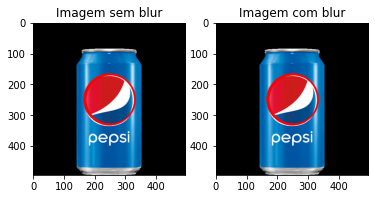

In [98]:
img_r = img.copy()
img_r_ = img.copy()

for (x, y, r) in circulos:
  cv2.circle(img_r, (x, y), r, (255, 0, 0), 4)

for (x, y, r) in circulos_b:
  cv2.circle(img_r_, (x, y), r, (255, 0, 0), 4)

plt.subplot(121),plt.imshow(img_r),plt.title("Imagem sem blur")
plt.subplot(122),plt.imshow(img_r_),plt.title("Imagem com blur")
plt.show()

Vamos partir para um caso mais desafiador:

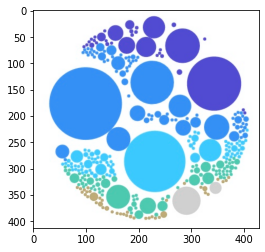

In [126]:
img = cv2.imread('plot.png')
plt.imshow(img)

Quando usamos a suavização na imagem da lata da Pepsi tivemos pouca mudança no resultado. Que tal testar aqui?

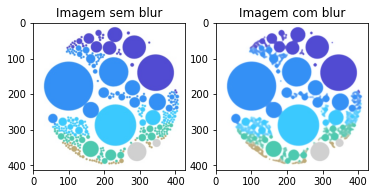

In [130]:
img = None # Convertemos primeiro para RGB
img_b = None.astype('uint8') # Use o tamanho do kernel 7

plt.subplot(121),plt.imshow(img),plt.title("Imagem sem blur")
plt.subplot(122),plt.imshow(img_b),plt.title("Imagem com blur")

img_cinza = None # Imagem original (img) em grayscale
img_b = None # Imagem com blur (img_b) em grayscale

Sem blur: círculo em (230, 286) com raio 58.
Sem blur: círculo em (99, 177) com raio 68.
Sem blur: círculo em (343, 140) com raio 51.
Sem blur: círculo em (225, 136) com raio 40.
Com blur: círculo em (99, 177) com raio 69.
Com blur: círculo em (343, 139) com raio 52.
Com blur: círculo em (230, 287) com raio 58.
Com blur: círculo em (225, 136) com raio 40.


(<matplotlib.axes._subplots.AxesSubplot at 0x7f4b61796650>,
 Text(0.5, 1.0, 'Imagem c/blur - 4 círculos'))

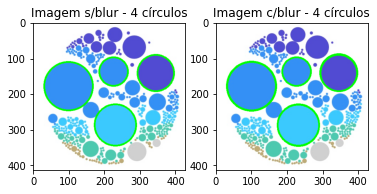

In [140]:
circulos = None # Use os mesmos argumentos que antes
circulos_b = None
img_r = img.copy()
img_r_ = img.copy()
if circulos is not None:
  circulos = np.round(circulos[0, :]).astype("int")
  for (x, y, r) in circulos:
    cv2.circle(img_r, (x, y), r, (0, 255, 0), 4)
if circulos_b is not None:
  circulos_b = np.round(circulos_b[0, :]).astype("int")
  for (x, y, r) in circulos_b:
    cv2.circle(img_r_, (x, y), r, (0, 255, 0), 4)

for c in circulos:
  print("Sem blur: círculo em (%d, %d) com raio %d." % (c[0], c[1], c[2]))
for k in circulos_b:
  print("Com blur: círculo em (%d, %d) com raio %d." % (k[0], k[1], k[2]))

plt.subplot(121),plt.imshow(img_r),plt.title("Imagem s/blur - %d círculos" % (len(circulos)))
plt.subplot(122),plt.imshow(img_r_),plt.title("Imagem c/blur - %d círculos" % (len(circulos_b)))

4 círculos é muito pouco. Vamos tunar os parâmetros e tentar encontrar mais círculos na imagem original:

In [147]:
dp = 1.1 #@param {type:"slider", min:1, max:3, step:0.1}
minDist = 80 #@param {type:"slider", min:50, max:200, step:1}
blur = True #@param {type:"boolean"}
input_image = "Chevette" #@param ["Plot", "Audi", "Chevette", "Frutas", "Olho", "Pepsi"]

img_list = {
    "Plot": 'plot.png',
    "Audi": 'audi.png',
    "Chevette": 'chevette.png',
    "Frutas": "frutas.png",
    "Olho": 'olho-1.png',
    "Pepsi": '240_pepsi_12oz.png'
}

img = cv2.imread(img_list[input_image])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
original = img.copy()
if blur:
  img = cv2.medianBlur(img,7).astype('uint8')

img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
circulos = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, dp=dp, minDist=minDist)
if circulos is not None:
  circulos = np.round(circulos[0, :]).astype("int")
  for (x, y, r) in circulos:
    cv2.circle(original, (x, y), r, (0, 255, 0), 4)
else:
  raise RuntimeError("Nenhum círculo encontrado")

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
fig.subplots_adjust(hspace=0, wspace=0)
ax.set_title("Circulos: %d" % (len(circulos)), fontsize=24)
ax.imshow(original)

RuntimeError: ignored

Alguns outros exemplos estão disponíveis junto com o Notebook. Que tal carregar essas imagens e ver os resultados?

### Tranformada generalizada

Infelizmente, não há código disponível para essa transformada no OpenCV. Mas temos dois repositórios abertos no GitHub que têm essa implementação de uma forma bem simples de usar:

1. https://github.com/adl1995/generalised-hough-transform
2. https://github.com/vmonaco/general-hough
3. http://amroamroamro.github.io/mexopencv/opencv/generalized_hough_demo.html